In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import csv

#DATA_FOLDER = '/content/gdrive/My Drive/101/results/logreg/'

subfolders = []
for a in range(1,7):
    for b in range(6,0,-1):
        subfolders.append('+1e-0'+str(a)+'_+1e-0'+str(b))

classifiers = ['logreg', 'mlp', 'better_cnn']
all_results = []

for clf in classifiers:
    print(clf)
    DATA_FOLDER = '/content/gdrive/My Drive/101/results/' + clf + '/'
    
    results = []
    matrix = np.zeros(36)
    methods = ['sgd', 'sgdn', 'adam', 'sgd_hd', 'sgdn_hd', 'adam_hd']
    for m in methods:
        for i, s in enumerate(subfolders):
            file = DATA_FOLDER + s + '/' + m + '.csv'
            with open(file, 'r') as f:
                loss = list(csv.reader(f))[-1][4] #training loss
                matrix[i] = np.round(float(loss),3)
        results.append(matrix.reshape(6,-1))
        matrix = np.zeros(36)
    
    all_results.append(results)
    


logreg
mlp
better_cnn


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


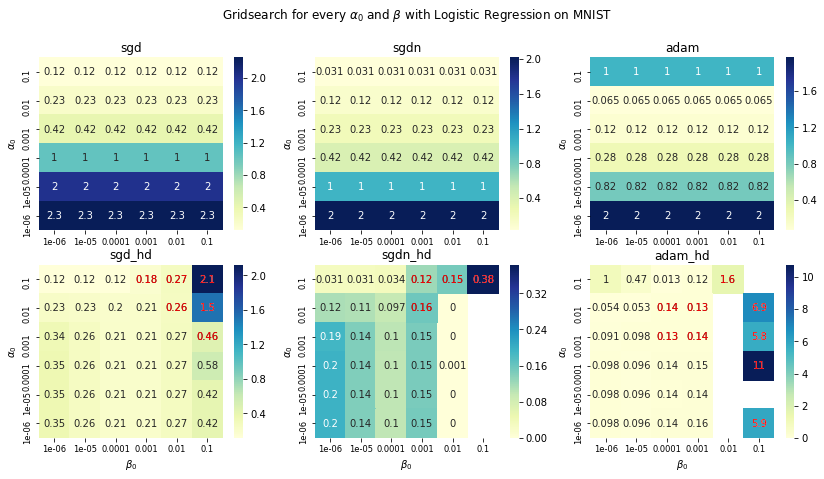

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,3, figsize=(14,7))
k=0
f.suptitle(r'Gridsearch for every ${\alpha}_{0}$ and $\beta$ with Logistic Regression on MNIST')
for i in range(2):
    for j in range(3):
        ax[i,j].set_title(methods[k])
        f = sns.heatmap(all_results[0][k], annot=True ,cmap="YlGnBu",cbar=True, ax=ax[i,j])
        if k > 2:
            f = sns.heatmap(all_results[0][k], annot=True ,cmap="YlGnBu",cbar=False, ax=ax[i,j], 
                            mask=np.round(all_results[0][k],2) <= np.round(all_results[0][k-3],2) , annot_kws={"color": "red"})
        k+=1
        f.set_xticklabels([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],fontsize='small')
        f.set_yticklabels([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],fontsize='small')
        if i==1:
            f.set_xlabel(r'$\beta_0$')
        f.set_ylabel(r'$\alpha_0$')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


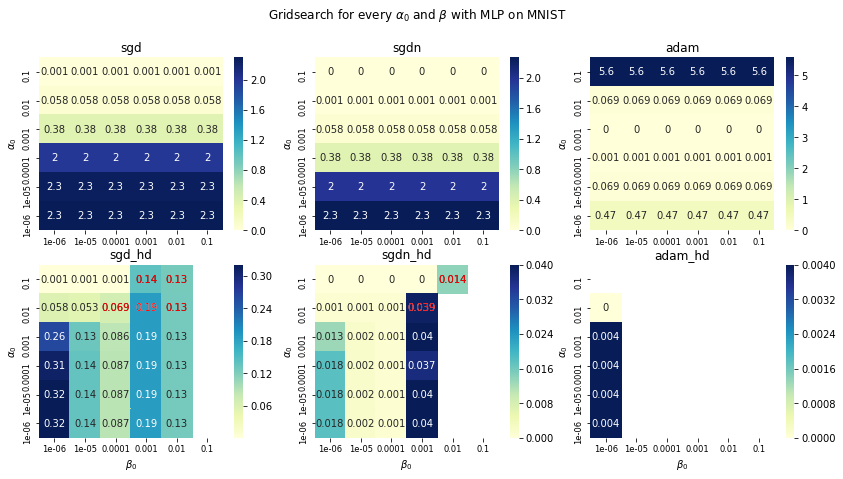

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,3, figsize=(14,7))
k=0
f.suptitle(r'Gridsearch for every ${\alpha}_{0}$ and $\beta$ with MLP on MNIST')
for i in range(2):
    for j in range(3):
        ax[i,j].set_title(methods[k])
        f = sns.heatmap(all_results[1][k], annot=True ,cmap="YlGnBu",cbar=True, ax=ax[i,j])
        if k > 2:
            f = sns.heatmap(all_results[1][k], annot=True ,cmap="YlGnBu",cbar=False, ax=ax[i,j], 
                            mask=np.round(all_results[1][k],2) <= np.round(all_results[1][k-3],2) , annot_kws={"color": "red"})
        k+=1
        f.set_xticklabels([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],fontsize='small')
        f.set_yticklabels([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],fontsize='small')
        if i==1:
            f.set_xlabel(r'$\beta_0$')
        f.set_ylabel(r'$\alpha_0$')        
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


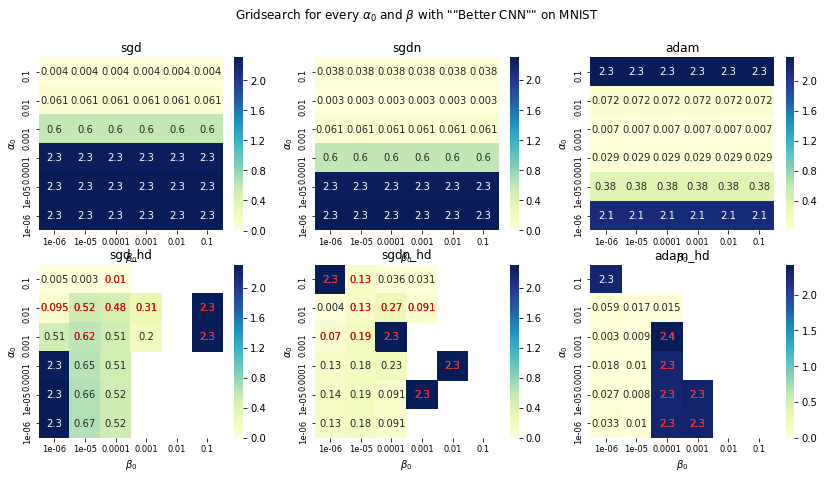

In [0]:
import seaborn 
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,3, figsize=(14,7))
k=0
f.suptitle(r'Gridsearch for every ${\alpha}_{0}$ and $\beta$ with ""Better CNN"" on MNIST')
for i in range(2):
    for j in range(3):
        ax[i,j].set_title(methods[k])
        f = sns.heatmap(all_results[2][k], annot=True ,cmap="YlGnBu",cbar=True, ax=ax[i,j])
        if k > 2:
            f = sns.heatmap(all_results[2][k], annot=True ,cmap="YlGnBu",cbar=False, ax=ax[i,j], 
                            mask=np.round(all_results[2][k],2) <= np.round(all_results[2][k-3],2) , annot_kws={"color": "red"})
        k+=1
        f.set_xticklabels([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],fontsize='small')
        f.set_yticklabels([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],fontsize='small')
        f.set_xlabel(r'$\beta_0$')
        f.set_ylabel(r'$\alpha_0$')    
plt.show()